In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
data=pd.read_csv("D:\Data Analytics\daily-website-visitors.csv")
print(data.head(7))

   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   
5    6     Friday            6  9/19/2014      2,815         1,863   
6    7   Saturday            7  9/20/2014      1,658         1,118   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  
5             1,622              241  
6               985              133  


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB
None


In [4]:
print(data.describe())

               Row  Day.Of.Week
count  2167.000000  2167.000000
mean   1084.000000     3.997231
std     625.703338     2.000229
min       1.000000     1.000000
25%     542.500000     2.000000
50%    1084.000000     4.000000
75%    1625.500000     6.000000
max    2167.000000     7.000000


In [5]:
day=data["Day"]
print(day)

0          Sunday
1          Monday
2         Tuesday
3       Wednesday
4        Thursday
          ...    
2162     Saturday
2163       Sunday
2164       Monday
2165      Tuesday
2166    Wednesday
Name: Day, Length: 2167, dtype: object


In [8]:
d_sort=data.sort_values(by='Page.Loads', ascending=False)
print(d_sort.head())

       Row        Day  Day.Of.Week        Date Page.Loads Unique.Visits  \
1319  1320  Wednesday            4   4/25/2018      7,984         5,541   
1548  1549     Monday            2  12/10/2018      7,840         5,421   
807    808    Tuesday            3  11/29/2016      7,714         5,338   
1549  1550    Tuesday            3  12/11/2018      7,659         5,267   
1541  1542     Monday            2   12/3/2018      7,650         5,378   

     First.Time.Visits Returning.Visits  
1319             4,616              925  
1548             4,465              956  
807              4,369              969  
1549             4,330              937  
1541             4,431              947  


In [5]:
df = pd.read_csv("D:\Data Analytics\daily-website-visitors.csv", thousands=',')
df = df.drop(['Row'], axis=1)
df.head()

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Sunday,1,9/14/2014,2146,1582,1430,152
1,Monday,2,9/15/2014,3621,2528,2297,231
2,Tuesday,3,9/16/2014,3698,2630,2352,278
3,Wednesday,4,9/17/2014,3667,2614,2327,287
4,Thursday,5,9/18/2014,3316,2366,2130,236


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
data=pd.read_csv("D:\Data Analytics\daily-website-visitors.csv")
data.head()

import plotly.express as px
px.histogram(data,x='Day',y='Unique.Visits',title='Sum of unique visits for each day over Time')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'Day=%{x}<br>sum of Unique.Visits=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['Sunday', 'Monday', 'Tuesday', ..., 'Monday', 'Tuesday', 'Wednesday'],
                         dtype=object),
              'xaxis': 'x',
              'y': array(['1,582', '2,528', '2,630', ..., '2,638', '2,683', '1,564'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sum of unique visits for each day over Time'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Day'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sum of Unique.Visits'}}}
})

array([[<Axes: xlabel='Day.Of.Week', ylabel='Day.Of.Week'>,
        <Axes: xlabel='Page.Loads', ylabel='Day.Of.Week'>,
        <Axes: xlabel='Unique.Visits', ylabel='Day.Of.Week'>,
        <Axes: xlabel='First.Time.Visits', ylabel='Day.Of.Week'>,
        <Axes: xlabel='Returning.Visits', ylabel='Day.Of.Week'>],
       [<Axes: xlabel='Day.Of.Week', ylabel='Page.Loads'>,
        <Axes: xlabel='Page.Loads', ylabel='Page.Loads'>,
        <Axes: xlabel='Unique.Visits', ylabel='Page.Loads'>,
        <Axes: xlabel='First.Time.Visits', ylabel='Page.Loads'>,
        <Axes: xlabel='Returning.Visits', ylabel='Page.Loads'>],
       [<Axes: xlabel='Day.Of.Week', ylabel='Unique.Visits'>,
        <Axes: xlabel='Page.Loads', ylabel='Unique.Visits'>,
        <Axes: xlabel='Unique.Visits', ylabel='Unique.Visits'>,
        <Axes: xlabel='First.Time.Visits', ylabel='Unique.Visits'>,
        <Axes: xlabel='Returning.Visits', ylabel='Unique.Visits'>],
       [<Axes: xlabel='Day.Of.Week', ylabel='First.Time.

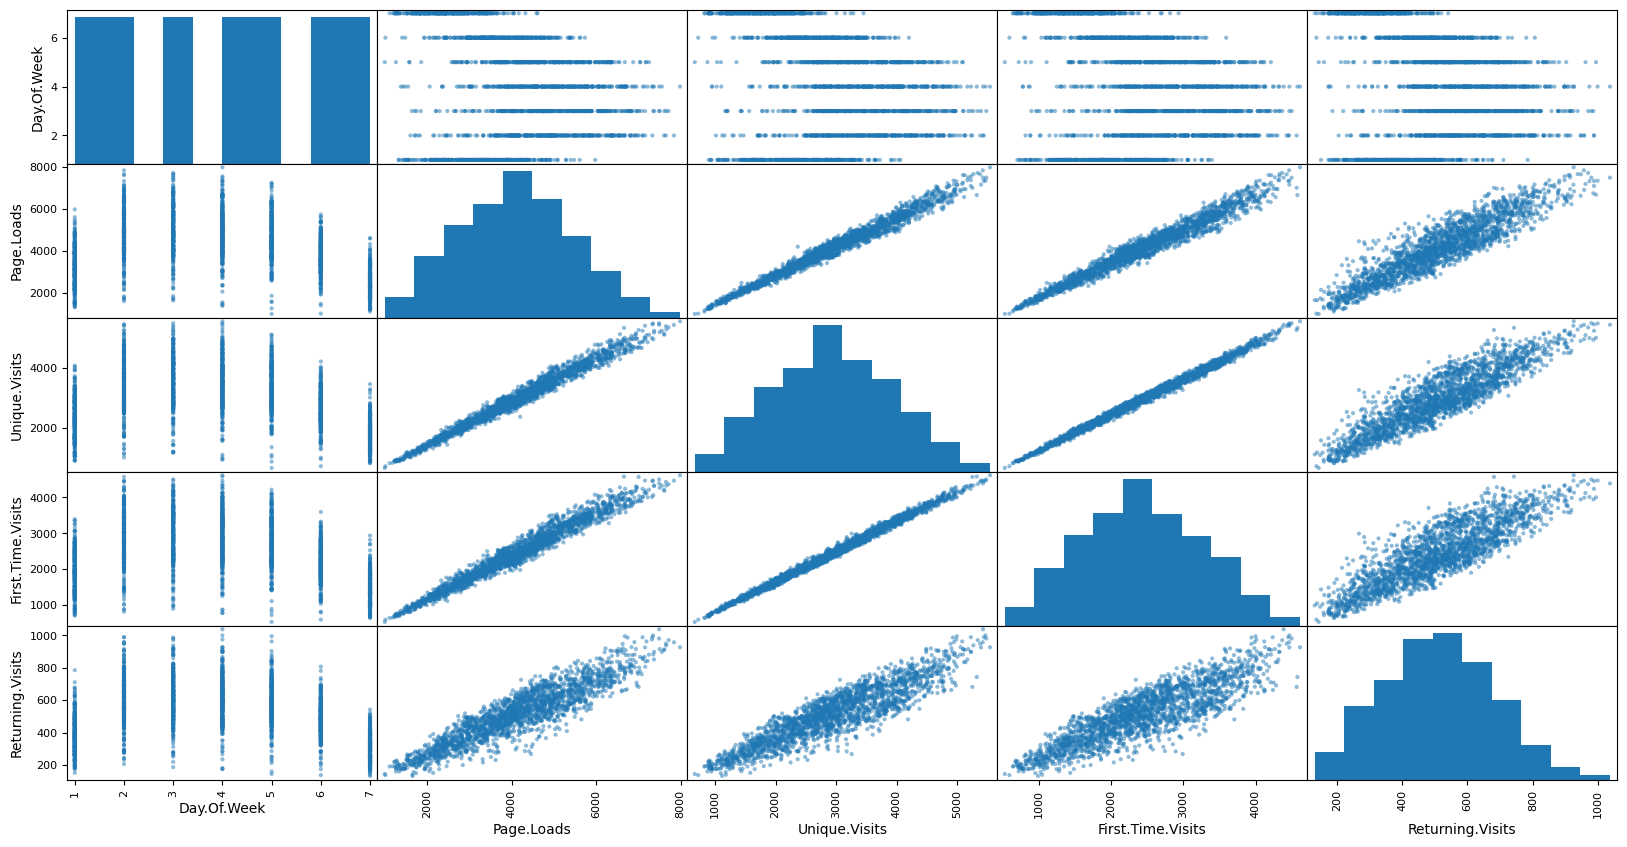

In [6]:
pd.plotting.scatter_matrix(df, figsize=(20,10))

In [9]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=True)

ValueError: could not convert string to float: 'Sunday'

In [10]:
from sklearn.model_selection import train_test_split

Y = df['Unique.Visits']
X = df[['Page.Loads']]

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

<Axes: >

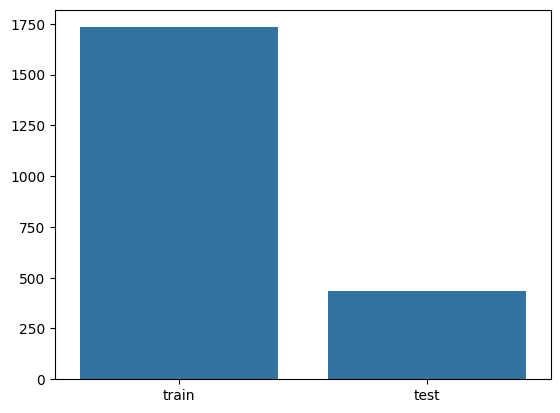

In [11]:
sns.barplot(x=['train','test'], y=[y_train.count(), y_test.count()])

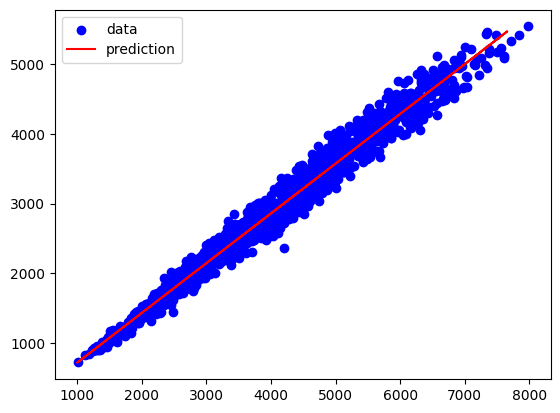

In [12]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt.scatter(x_train, y_train, color="blue", label="data")
plt.plot(x_test, preds, color="red", label="prediction")
plt.legend()